## Import Package

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression

## Load Dataset

In [ ]:
#simplified Data
df = pd.read_csv('boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Data Definition


1.  CRIM: per capita crime rate by
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
4. NOX: nitric oxides concentration (parts per 10 million)
5. RM: average number of rooms per dwelling
6. AGE: proportion of owner-occupied units built prior to 1940
7. DIS: weighted distances to ﬁve Boston employment centers
8. RAD: index of accessibility to radial highways
9. TAX: full-value property-tax rate per $10,000
10. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

11. PTRATIO: pupil-teacher ratio by town
12. B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town
13. LSTAT: % lower status of the population
14. MEDV: Median value of owner-occupied homes in $1000s




## Data Preprocessing

###Check missing value and null value

In [ ]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

no missing and null value

###Check duplicate value

In [ ]:
df.duplicated().sum()

0

no duplicate row

### Statistical Summary

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Check Outlier

In [ ]:
features  = list(df)[:-1]
features

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

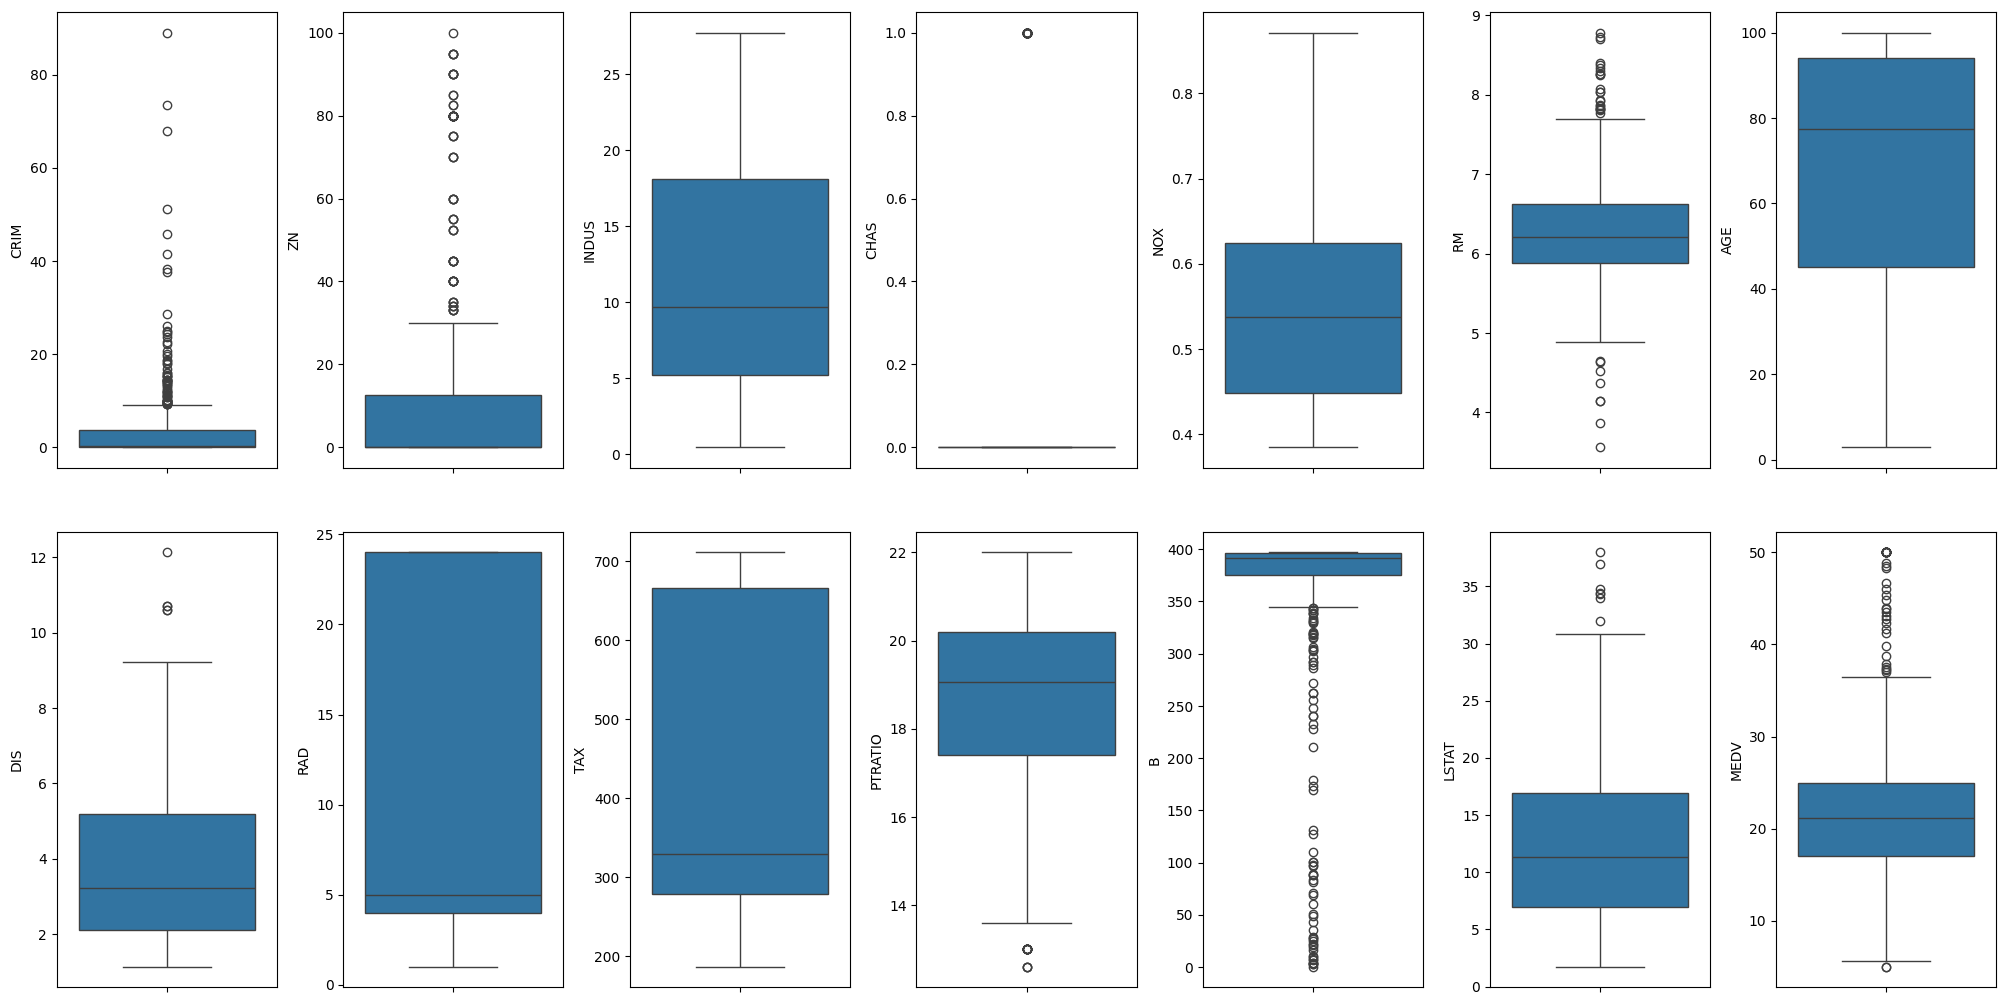

In [ ]:
#checking outliers using boxplot
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
count = 0
axs = axs.flatten()
for tar,var in df.items():
    sns.boxplot(y=tar, data=df, ax=axs[count])
    count= count+1
plt.tight_layout(pad=0.5, w_pad=0.78, h_pad=4.0)

In [ ]:
#outliers in percentage
for tar,var in df.items():
    q1=var.quantile(0.25)
    q3=var.quantile(0.75)
    iqr=q3-q1
    var_col=var[(var<=q1-1.5*iqr) | (var>=q3+1.5*iqr)]
    perc=np.shape(var_col)[0]*100.0/np.shape(df)[0]
    print("Column %s outliers = %.2f%%" % (tar, perc))


Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


handle the outliers with data transformation method

In [ ]:
# Features of interest
features_of_interest = ['CRIM', 'ZN', 'LSTAT']

# Log transformation
for feature in features_of_interest:
    df[feature] = np.log10(df[feature] + 1)  # Apply log transformation

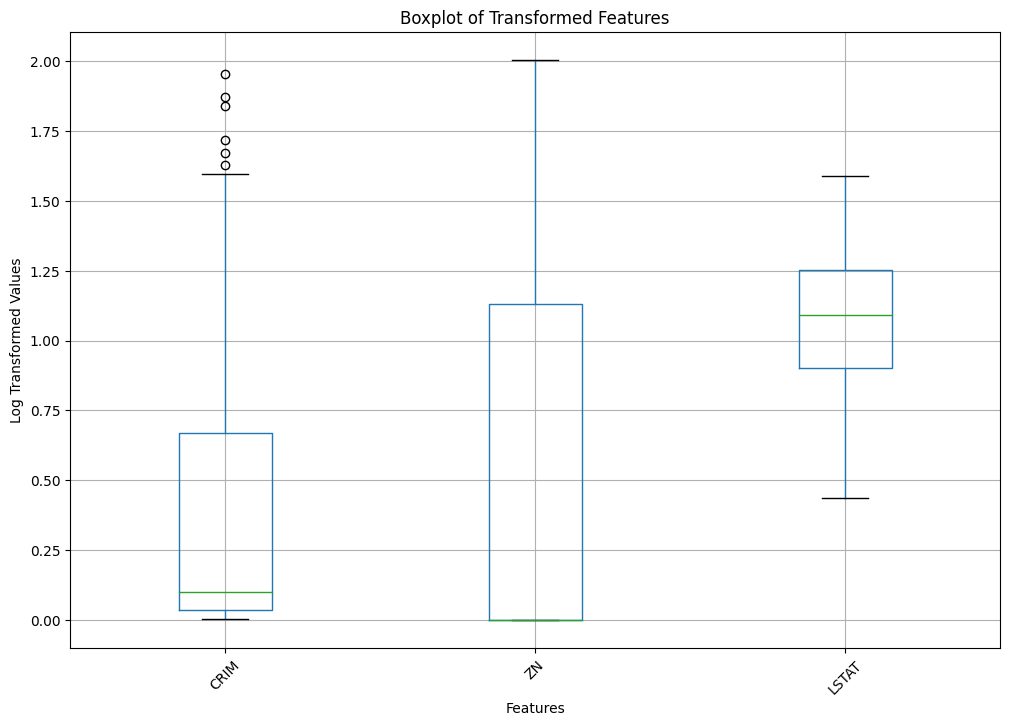

In [ ]:
# Plotting boxplots
plt.figure(figsize=(12, 8))
df[features_of_interest].boxplot()
plt.title('Boxplot of Transformed Features')
plt.ylabel('Log Transformed Values')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
#outliers in percentage
for tar,var in df.items():
    q1=var.quantile(0.25)
    q3=var.quantile(0.75)
    iqr=q3-q1
    var_col=var[(var<=q1-1.5*iqr) | (var>=q3+1.5*iqr)]
    perc=np.shape(var_col)[0]*100.0/np.shape(df)[0]
    print("Column %s outliers = %.2f%%" % (tar, perc))

Column CRIM outliers = 1.19%
Column ZN outliers = 0.00%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 0.00%
Column MEDV outliers = 7.91%


the percentage of outliers is decreased

### Correlation Matrix

In [ ]:
corr=df.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.410737,0.660283,-0.016398,0.707587,-0.288784,0.559591,-0.586366,0.904753,0.860381,0.390052,-0.508852,0.561023,-0.464084
ZN,-0.410737,1.000000,-0.593145,-0.041368,-0.547900,0.334936,-0.577424,0.692269,-0.351745,-0.392140,-0.455959,0.213681,-0.484425,0.384007
INDUS,0.660283,-0.593145,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.605194,-0.483725
CHAS,-0.016398,-0.041368,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.070307,0.175260
NOX,0.707587,-0.547900,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.584484,-0.427321
RM,-0.288784,0.334936,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.661247,0.695360
AGE,0.559591,-0.577424,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.613294,-0.376955
DIS,-0.586366,0.692269,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.488015,0.249929
RAD,0.904753,-0.351745,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.467853,-0.381626
TAX,0.860381,-0.392140,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.529948,-0.468536


<Axes: >

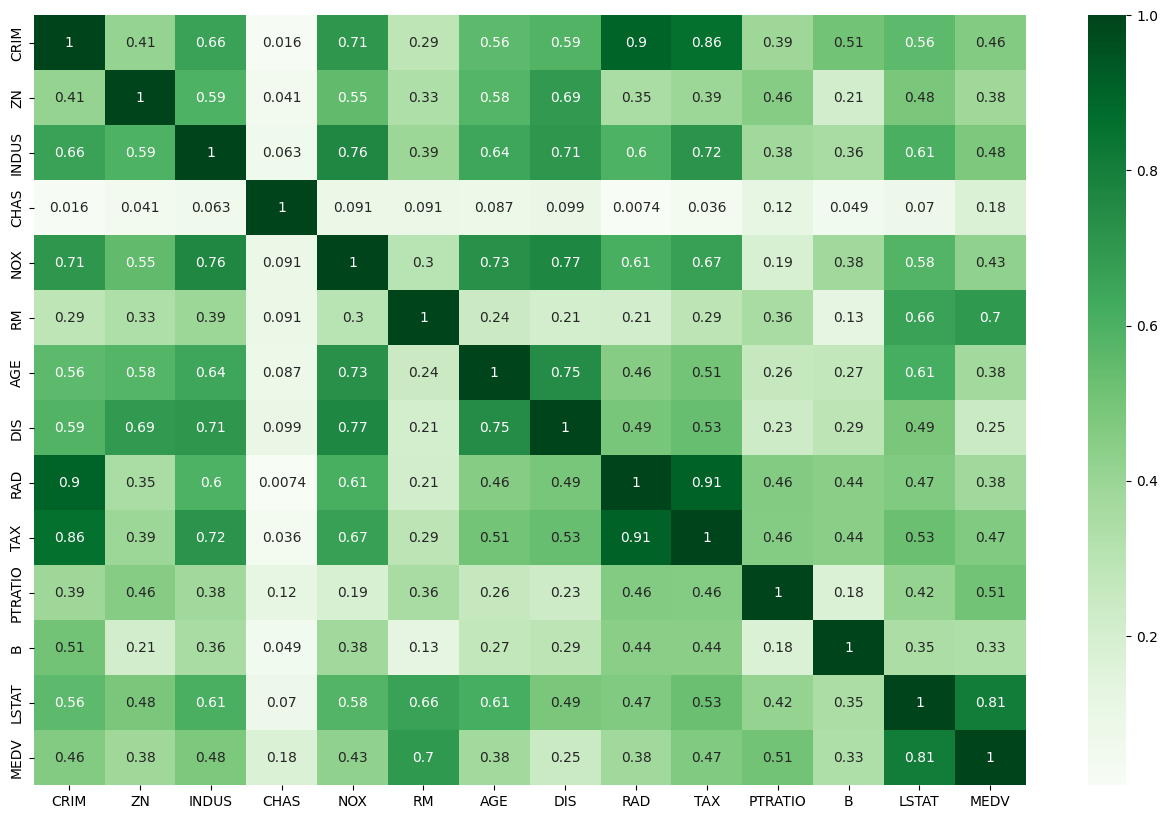

In [ ]:
#using a heatmap to see correlation between features more clearly.
plt.figure(figsize=(16,10))
sns.heatmap(corr.abs(), annot=True,cmap='Greens')

1. Strong positive correlation between the number of rooms (RM) and median housing prices (MEDV).
2. Strong positive correlation between the percentage of lower status population (LSTAT) and median housing prices.
3. Potential multicollinearity between accessibility to radial highways `(RAD)` , property-tax rate `(TAX)`, per capita crime rate by `(CRIM)`, nitric oxides concentration (parts per 10 million) `(NOX)`.

In [ ]:
df = df.drop(['RAD', 'TAX','NOX','CRIM'], axis=1)

<Axes: >

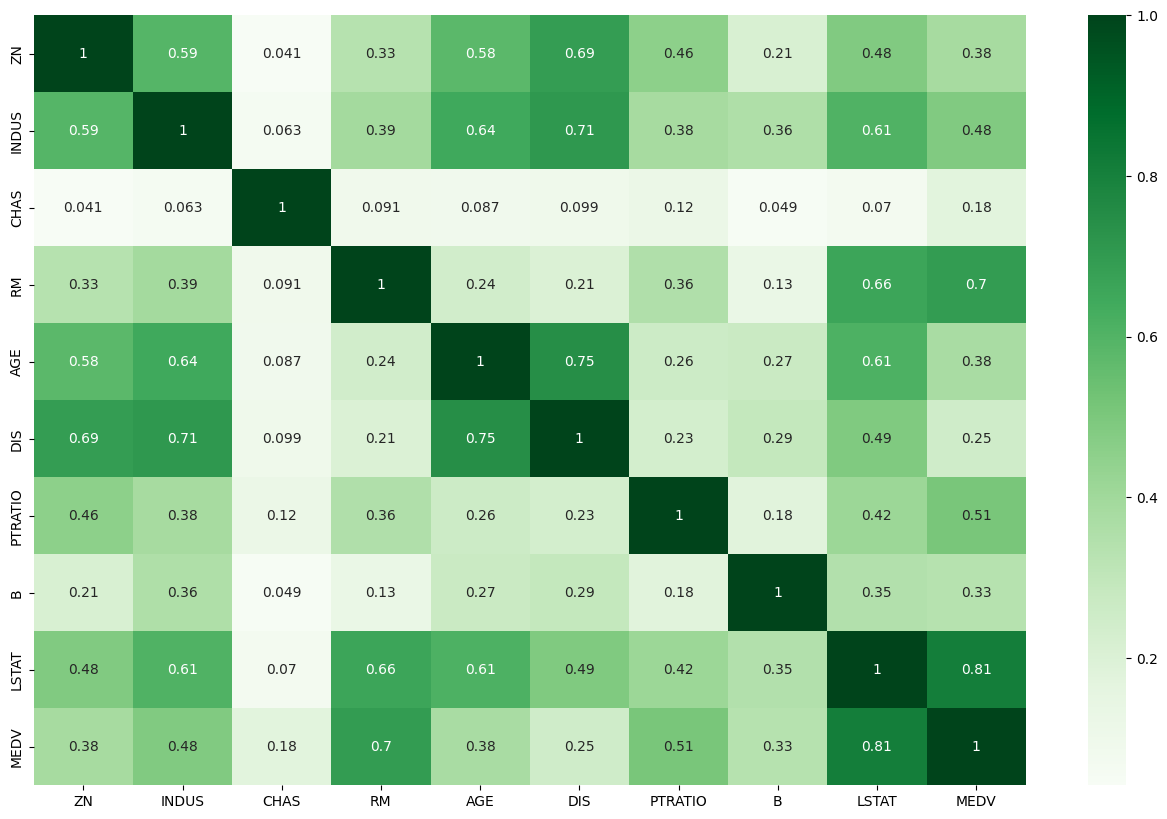

In [ ]:
corr=df.corr()
corr

plt.figure(figsize=(16,10))
sns.heatmap(corr.abs(), annot=True,cmap='Greens')

### Split feature and target

In [ ]:
# Spliting target variable and independent variables
X = df.drop(['MEDV'], axis = 1)
y = df['MEDV']

In [ ]:
features = list(X)
features

['ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT']

### Scalling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [ ]:
boston_std = pd.DataFrame(data = X_scaled, columns = features)
boston_std.head()

,ZN,INDUS,CHAS,RM,AGE,DIS,PTRATIO,B,LSTAT
0,1.229330,-1.287909,-0.272599,0.413672,-0.120013,0.140214,-1.459000,0.441052,-1.276118
1,-0.589091,-0.593381,-0.272599,0.194274,0.367166,0.557160,-0.303094,0.441052,-0.295491
2,-0.589091,-0.593381,-0.272599,1.282714,-0.265812,0.557160,-0.303094,0.396427,-1.597382
3,-0.589091,-1.306878,-0.272599,1.016303,-0.809889,1.077737,0.113032,0.416163,-2.050937
4,-0.589091,-1.306878,-0.272599,1.228577,-0.511180,1.077737,0.113032,0.441052,-1.170492


### PCA Processing

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=9)
pca.fit(X_scaled)
pcs = pca.transform(X_scaled)
pcs[0:10]

array([[ 2.23677091,  0.54085974,  0.40090645, -0.07608282, -1.03172548,
        -0.01172363, -0.27905739,  0.88240205, -0.13362927],
       [ 0.44733838,  0.02267   , -0.17429234, -0.5679098 , -0.22488041,
         0.16656323, -0.73108308, -0.29435691, -0.61413325],
       [ 1.51203286,  0.688944  ,  0.34754836, -1.26542848,  0.52389773,
         0.54201267, -0.24577377, -0.21576823, -0.66508109],
       [ 2.23484939,  0.11681737,  0.09156032, -1.22378501,  1.10627861,
         0.84055529, -0.56664953,  0.03991236, -0.77754958],
       [ 1.82695188,  0.08298682,  0.10060463, -1.10701676,  0.86537015,
         0.34695659, -0.88075707, -0.44196021, -0.4672146 ],
       [ 1.48891023, -0.35255026, -0.25820225, -0.7193086 ,  0.59393129,
         0.61103054, -0.89840748,  0.04474586, -0.79522119],
       [ 1.2593116 , -0.3050182 , -0.06682806,  0.77406438, -1.50546664,
        -0.21208742, -0.09070982, -0.20118618, -0.23447098],
       [ 0.68050085, -0.16688803, -0.00921573,  0.8088842 , -1

In [ ]:
#transform it into data frame
pdf = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9'])
pdf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
0,2.236771,0.540860,0.400906,-0.076083,-1.031725,-0.011724,-0.279057,0.882402,-0.133629
1,0.447338,0.022670,-0.174292,-0.567910,-0.224880,0.166563,-0.731083,-0.294357,-0.614133
2,1.512033,0.688944,0.347548,-1.265428,0.523898,0.542013,-0.245774,-0.215768,-0.665081
3,2.234849,0.116817,0.091560,-1.223785,1.106279,0.840555,-0.566650,0.039912,-0.777550
4,1.826952,0.082987,0.100605,-1.107017,0.865370,0.346957,-0.880757,-0.441960,-0.467215


###Skree Plot

In [ ]:
print('Explained variance:', pca.explained_variance_)
print('Explained variance ratio:', pca.explained_variance_ratio_*100)

Explained variance: [4.12040757 1.29215735 0.9260164  0.81970305 0.72225471 0.41444315
 0.34917254 0.20137862 0.17228839]
Explained variance ratio: [45.69182747 14.32892978 10.26873692  9.08981208  8.0091926   4.59582324
  3.87202755  2.23311816  1.91053221]


In [ ]:
var_cumsum = np.cumsum(pca.explained_variance_ratio_*100)
var_cumsum

array([ 45.69182747,  60.02075724,  70.28949417,  79.37930625,
        87.38849885,  91.98432209,  95.85634963,  98.08946779,
       100.        ])

   Principal Component  Cumulative Explained Variance (%)
0                    1                          45.691827
1                    2                          60.020757
2                    3                          70.289494
3                    4                          79.379306
4                    5                          87.388499
5                    6                          91.984322
6                    7                          95.856350
7                    8                          98.089468
8                    9                         100.000000


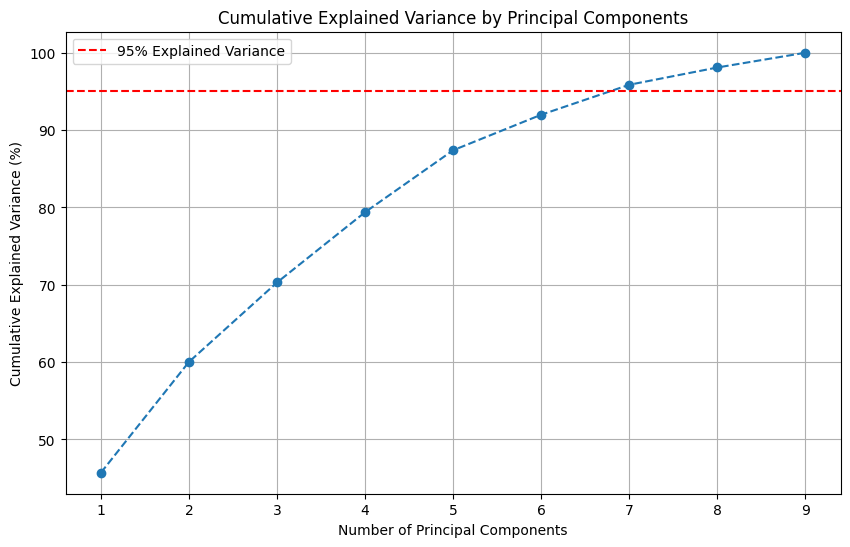

In [ ]:
# Convert to DataFrame
variance_df = pd.DataFrame({
    'Principal Component': range(1, len(var_cumsum) + 1),
    'Cumulative Explained Variance (%)': var_cumsum
})

# Print the DataFrame
print(variance_df)

# Plotting the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(variance_df['Principal Component'], variance_df['Cumulative Explained Variance (%)'], marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Cumulative Explained Variance by Principal Components')
plt.axhline(y=95, color='r', linestyle='--', label='95% Explained Variance')
plt.legend()
plt.grid()
plt.show()

The graph shows that 90% of the data information is already covered starting from PC 6

In [ ]:
pca.explained_variance_ratio_[0:6].sum()*100

91.98432208703461

because of that we will use only PC6, because it is already cover 90% information in data original

#### Feature Reduction

In [ ]:
pca = PCA(n_components=6)
pca.fit(X_scaled)
pcs = pca.transform(X_scaled)

X_scaled_pca = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6'])
X_scaled_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6
0,2.236771,0.540860,0.400906,-0.076083,-1.031725,-0.011724
1,0.447338,0.022670,-0.174292,-0.567910,-0.224880,0.166563
2,1.512033,0.688944,0.347548,-1.265428,0.523898,0.542013
3,2.234849,0.116817,0.091560,-1.223785,1.106279,0.840555
4,1.826952,0.082987,0.100605,-1.107017,0.865370,0.346957


In [ ]:
features_pca = list(X_scaled_pca)

#### Split Dataset

WITHOUT PCA

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=5)

WITH PCA

In [ ]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_scaled_pca, y, test_size = 0.2, random_state=5)

In [ ]:
# Output shapes of the datasets
print(f'Original X_train shape: {X_train.shape}')
print(f'Original X_test shape: {X_test.shape}')
print(f'PCA-transformed X_train shape: {X_train_pca.shape}')
print(f'PCA-transformed X_test shape: {X_test_pca.shape}')

Original X_train shape: (404, 9)
Original X_test shape: (102, 9)
PCA-transformed X_train shape: (404, 6)
PCA-transformed X_test shape: (102, 6)


1. The original training set (X_train) and test set (X_test) have 404 and 102 samples, respectively, with 9 features each.

2. The PCA-transformed training (X_train_pca) and test sets (X_test_pca) also have 404 and 102 samples, respectively, with 6 principal components each.

## Regression Model

## Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

### WITHOUT PCA

In [ ]:
#define the model
lasso_reg = Lasso(alpha=0.1,
                  random_state=42)

lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.1, random_state=42)

### WITH PCA

In [ ]:
lasso_reg_pca = Lasso(alpha=0.1,
                  random_state=42)

lasso_reg_pca.fit(X_train_pca, y_train_pca)

Lasso(alpha=0.1, random_state=42)

## Model Evaluation

Compare the result with PCA and without PCA

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

### WITHOUT PCA

Training and Testing data evaluation

In [ ]:
y_predict_train = lasso_reg.predict(X_train)

In [ ]:
y_predict_test= lasso_reg.predict(X_test)

Testing VS Training data metrics evaluation

In [ ]:
metrics = {
    'Metric': ['R-squared', 'RMSE', 'MAE', 'MAPE'],
    'Test Data': [
        r2_score(y_test, y_predict_test) * 100,
        np.sqrt(mean_squared_error(y_test, y_predict_test)),
        mean_absolute_error(y_test, y_predict_test),
        mean_absolute_percentage_error(y_test, y_predict_test)
    ],
    'Train Data': [
        None,  # R-squared for training data is typically not displayed
        np.sqrt(mean_squared_error(y_train, y_predict_train)),
        mean_absolute_error(y_train, y_predict_train),
        mean_absolute_percentage_error(y_train, y_predict_train)
    ]
}

# Creating the DataFrame
metrics_df = pd.DataFrame(metrics)

# Filling R-squared for training data
metrics_df.loc[metrics_df['Metric'] == 'R-squared', 'Train Data'] = r2_score(y_train, y_predict_train) * 100

print(metrics_df)

      Metric  Test Data  Train Data
0  R-squared  79.153596   75.813679
1       RMSE   4.039982    4.558120
2        MAE   3.015259    3.213945
3       MAPE   0.152251    0.160346


1. Overall metrics evaluation on the test data is better than on the training data, indicating that the Lasso regression model without PCA is not overfitting.

2. Metric evaluation on the training data is good, as evidenced by the MAPE value being only 16%.

3. The R² score shows that 79.10% of the variability in medv (house price) is successfully explained using all the features in the model.

4. We can conclude that the model fits well.

## Model Intrepretation: without PCA

In [ ]:

# Extract the intercept and coefficients
intercept = lasso_reg.intercept_
coefficients = lasso_reg.coef_

# Create a DataFrame to display the intercept and coefficients
results = pd.DataFrame({
    'Feature': ['Intercept'] + features,
    'Coefficient': [intercept] + list(coefficients)
})

print(results)

     Feature  Coefficient
0  Intercept    22.456080
1         ZN     0.164364
2      INDUS    -0.521922
3       CHAS     0.548867
4         RM     1.776747
5        AGE     0.132038
6        DIS    -1.668984
7    PTRATIO    -1.449816
8          B     0.809496
9      LSTAT    -5.880111


In [ ]:
# Define the coefficients from the table
coefficients = {
    "intercept": 22.456080,
    "zn": 0.164364,
    "indus": -0.521922,
    "chas": 0.548867,
    "rm": 1.776747,
    "age": 0.132038,
    "dis": -1.668984,
    "ptratio": -1.449816,
    "b": 0.809496,
    "lstat": -5.880111
}
# Creating the formula string
formula = "target = {intercept:.6f}".format(intercept=coefficients["intercept"])

for feature, coef in coefficients.items():
    if feature != "intercept":
        if coef != 0:
            formula += " {sign} {coef} * {feature}".format(
                sign="+" if coef > 0 else "-", coef=abs(coef), feature=feature
            )

print(formula)

target = 22.456080 + 0.164364 * zn - 0.521922 * indus + 0.548867 * chas + 1.776747 * rm + 0.132038 * age - 1.668984 * dis - 1.449816 * ptratio + 0.809496 * b - 5.880111 * lstat


- Intercept (22.456080): This is the baseline predicted house price when all other predictors are zero, approximately 22,456.08.

- ZN (zn): For each unit increase in the proportion of residential land zoned for large lots (zn), the house price is expected to increase by approximately 0.16, holding all other predictors constant.

- INDUS (indus): For each unit increase in the proportion of non-retail business acres per town (indus), the house price is expected to decrease by approximately 0.52, holding all other predictors constant.

- CHAS (chas): If the property bounds the Charles River (chas = 1), the house price is expected to increase by approximately 0.55, holding all other predictors constant. If not, there is no significant impact on the house price.

- RM (rm): For each additional room (rm), the house price is expected to increase by approximately 1.78, holding all other predictors constant.

- AGE (age): For each unit increase in the proportion of owner-occupied units built before 1940 (age), the house price is expected to increase by approximately 0.13, holding all other predictors constant.

- DIS (dis): For each unit increase in the weighted distances to five Boston employment centers (dis), the house price is expected to decrease by approximately 1.67, holding all other predictors constant.

- PTRATIO (ptratio): For each unit increase in the pupil-teacher ratio by town (ptratio), the house price is expected to decrease by approximately 1.45, holding all other predictors constant.

- B (b): For each unit increase in the calculated variable based on the proportion of blacks by town (b), the house price is expected to increase by approximately 0.81, holding all other predictors constant.

- LSTAT (lstat): For each percentage increase in the percentage of lower status of the population (lstat), the house price is expected to decrease by approximately 5.88, holding all other predictors constant.

This interpretation provides a clear understanding of how each predictor influences the predicted house price, considering the coefficients provided in the linear regression model.

### WITH PCA

Training and Testing data evaluation

In [ ]:
y_predict_train_pca = lasso_reg_pca.predict(X_train_pca)

In [ ]:
y_predict_test_pca = lasso_reg_pca.predict(X_test_pca)

Testing VS Training data metrics evaluation

In [ ]:
metrics = {
    'Metric': ['R-squared', 'RMSE', 'MAE', 'MAPE'],
    'Test Data': [
        r2_score(y_test_pca, y_predict_test_pca) * 100,
        np.sqrt(mean_squared_error(y_test_pca, y_predict_test_pca)),
        mean_absolute_error(y_test_pca, y_predict_test_pca),
        mean_absolute_percentage_error(y_test_pca, y_predict_test_pca)
    ],
    'Train Data': [
        r2_score(y_train_pca, y_predict_train_pca) * 100,
        np.sqrt(mean_squared_error(y_train_pca, y_predict_train_pca)),
        mean_absolute_error(y_train_pca, y_predict_train_pca),
        mean_absolute_percentage_error(y_train_pca, y_predict_train_pca)
    ]
}

# Creating the DataFrame
metrics_df = pd.DataFrame(metrics)

print(metrics_df)

      Metric  Test Data  Train Data
0  R-squared  79.626625   72.193870
1       RMSE   3.993883    4.887324
2        MAE   2.888754    3.245286
3       MAPE   0.148532    0.166709


1. Overall metrics evaluation on the test data is better than on the training data, indicating that the Lasso regression model with PCA is not overfitting.

2. Metric evaluation on the training data is good, as evidenced by the MAPE value being only 16%.

3. The R² score shows that 79.60% of the variability in medv (house price) is successfully explained using all the features in the model.

4. We can conclude that the model fits well.

## Model Intrepretation: with PCA

In [ ]:

# Extract the intercept and coefficients
intercept = lasso_reg_pca.intercept_
coefficients = lasso_reg_pca.coef_

# Create a DataFrame to display the intercept and coefficients
results = pd.DataFrame({
    'Feature': ['Intercept'] + features_pca,
    'Coefficient': [intercept] + list(coefficients)
})

print(results)

     Feature  Coefficient
0  Intercept    22.478843
1        pc1     3.022652
2        pc2     3.828501
3        pc3     0.444471
4        pc4    -2.412008
5        pc5     0.192367
6        pc6     1.269731


In [ ]:
coefficients = {
    "intercept": 22.478843,
    "pc1": 3.022652,
    "pc2": 3.828501,
    "pc3": 0.444471,
    "pc4": -2.412008,
    "pc5": 0.192367,
    "pc6": 1.269731
}

# Creating the formula string
formula = "target = {intercept:.6f}".format(intercept=coefficients["intercept"])

for feature, coef in coefficients.items():
    if feature != "intercept":
        if coef != 0:
            formula += " {sign} {coef} * {feature}".format(
                sign="+" if coef > 0 else "-", coef=abs(coef), feature=feature
            )

print(formula)

target = 22.478843 + 3.022652 * pc1 + 3.828501 * pc2 + 0.444471 * pc3 - 2.412008 * pc4 + 0.192367 * pc5 + 1.269731 * pc6


Intercept (22.478843): This is the baseline predicted value of the target variable when all other predictors are zero, approximately 22.478843.

- Positive Impacts: Higher proportions of PC1,PC2,PC3,PC5, and PC6 positively impact the target value (house price) while PC4 give negative impacts.

for example:
For each unit increase in pc1, the target variable is expected to increase by approximately 3.022652 units, holding all other predictors constant while For each unit increase in pc4, the target variable is expected to decrease by approximately 2.412008 units, holding all other predictors constant.

### WITHOUT PCA VS WITH PCA TEST RESULT

In [ ]:
# Calculate metrics for test data without PCA
r2_test = r2_score(y_test, y_predict_test) * 100
rmse_test = np.sqrt(mean_squared_error(y_test, y_predict_test))
mae_test = mean_absolute_error(y_test, y_predict_test)
mape_test = mean_absolute_percentage_error(y_test, y_predict_test)

# Calculate metrics for test data with PCA
r2_test_pca = r2_score(y_test_pca, y_predict_test_pca) * 100
rmse_test_pca = np.sqrt(mean_squared_error(y_test_pca, y_predict_test_pca))
mae_test_pca = mean_absolute_error(y_test_pca, y_predict_test_pca)
mape_test_pca = mean_absolute_percentage_error(y_test_pca, y_predict_test_pca)

# Create a dictionary with the metrics
metrics = {
    'Metric': ['R-squared', 'RMSE', 'MAE', 'MAPE'],
    'Test Data without PCA': [r2_test, rmse_test, mae_test, mape_test],
    'Test Data with PCA': [r2_test_pca, rmse_test_pca, mae_test_pca, mape_test_pca]
}

# Create the DataFrame
metrics_df = pd.DataFrame(metrics)

print(metrics_df)

      Metric  Test Data without PCA  Test Data with PCA
0  R-squared              79.153596           79.626625
1       RMSE               4.039982            3.993883
2        MAE               3.015259            2.888754
3       MAPE               0.152251            0.148532


Overall metrics evaluation is better with PCA compared to without PCA.